In [1]:
import numpy as np
import matplotlib.pyplot as plt
import SIR_python

In [2]:
def error(data, data_0_5):
    ## skip first dimension
    dat = data[:,1:]
    dat_0_5 = data_0_5[:,1:]
    err = np.abs(dat - dat_0_5)
    return np.max(err)

In [3]:
S0 = 999
I0 = 1
R0 = 0
beta = 0.2
gamma = 0.1


In [4]:
dts = np.logspace(0, -6, num=30)
ers = []
for dt in dts:
    time_days = 100 
    numsteps = int(time_days / dt)
    return_every = int(1/dt)
    sim = SIR_python.integrate_system(S0, I0, R0, beta, gamma, dt,numsteps, return_every)
    sim_0_5 = SIR_python.integrate_system(S0, I0, R0, beta, gamma, dt/2,numsteps*2, return_every*2)
    er = error(sim, sim_0_5)
    ers.append(er)

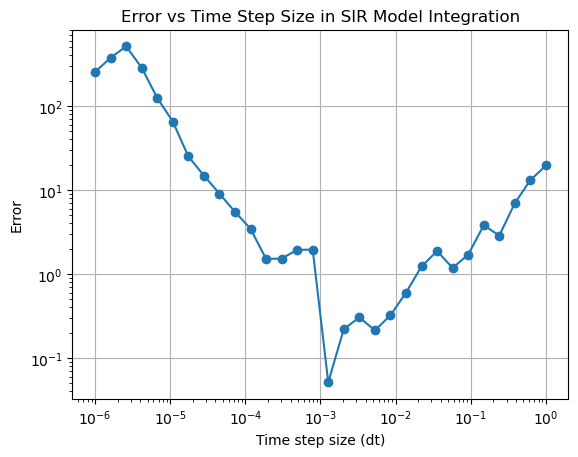

In [5]:
plt.plot(dts, ers, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Time step size (dt)')
plt.ylabel('Error')
plt.title('Error vs Time Step Size in SIR Model Integration')
plt.grid(True)